# COGS 118A: Supervised Machine Learning Algorithms
## Parabola Estimation

This Jupyter notebook contains starter codes for the Parabola Estimation questions on my assignment that used the a combination of the L1 and L2 norm, and gradient descent (where on gradient descent there is a comparison between different values of alpha that are visualized together). I used this notebook as a starting point to code the answers to the questions. The skeleton of the functions I needed to use were provided, and I just needed to fill the code where I was instructed to. 

In [114]:
# Importing Important packages (nothing to add to this cell)

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [115]:
# Loading the data (nothing to add to this cell)

X_and_Y = np.load('./parabola-estimation.npy')
old_X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)
old_X.shape

(300,)

### Original Data

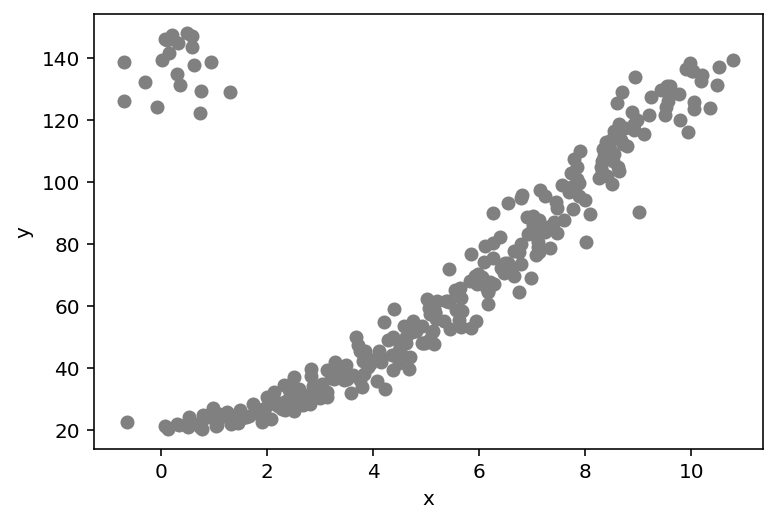

In [116]:
# Visualization of the original datapoints (nothing to add to this cell).

def vis(w0, w1, w2):
    draw_plane = (w0 is not None) and (w1 is not None) and (w2 is not None)
    if draw_plane:
        X_line = np.linspace(0,10,300)
        Y_line = w0 + w1 * X_line + w2 * (X_line**2)
        plt.plot(X_line, Y_line, color='orange')
        
    plt.scatter(old_X, Y, color='gray')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
vis(None, None, None)

### Parabola Estimation with Squared $L_2$ Norm

Assume data points are represented as matrices $X$ and $Y$, please use the closed form solution to calculate the parameters $W$.


In [117]:
# Estimating W, which defines the parabola estimation (you need to add code to this cell as indicated below).
# y = w0 + w1*x + w2*x^2

X = np.matrix(np.hstack((np.ones((len(old_X),1)),
                         old_X.reshape(-1,1), 
                         (old_X**2).reshape(-1,1))))

W = np.dot((np.dot(((np.dot(X.T, X)).I), X.T)), Y)
#  Hint: In the form of X and Y.

w0, w1, w2 = np.array(W).reshape(-1)
print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))

y = 71.07 + -16.06*x + 2.36*x^2


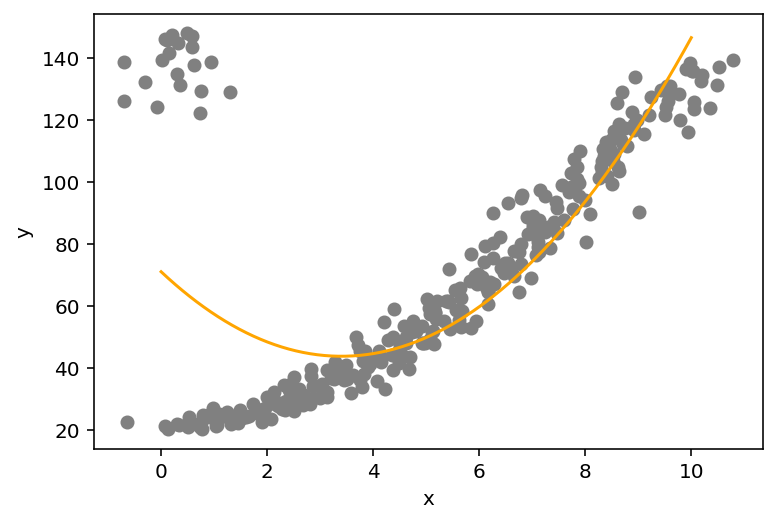

In [118]:
# Visualization of the original datapoints and estimated plane (nothing to add to this cell).

vis(w0, w1, w2)

### Parabola Estimation with $L_1$  Norm

In this problem, we would like to use the gradient descent to calculate the parameters $W$ for the parabola.
If we have a loss function $\mathcal{L}(W)$, then a typical gradient descent algorithm contains the following steps:

**Step 1**. Initialize the parameters W.

for i = 1 to #iterations:

- **Step 2**. Compute the gradient $\nabla \mathcal{L}(W) = \frac{\partial \mathcal{L}(W)}{\partial W}$.

- **Step 3**. Update the parameters $W \leftarrow \mathcal{L}(W) = W - \eta \frac{\partial \mathcal{L}(W)}{\partial W}$ where $\eta$ is the learning rate.

**Hint**: You may refer to HW3 Q5.

In [119]:
# Gradient of L(W) with respect to W (you need to add code to this cell as indicated below).

def grad_L_W(X, Y, W):
    return (np.dot((np.sign((np.dot(X, W)) - Y)).T, X)).T

    #Hint: implement Step 2 above!

y = 15.10 + 4.27*x + 0.77*x^2


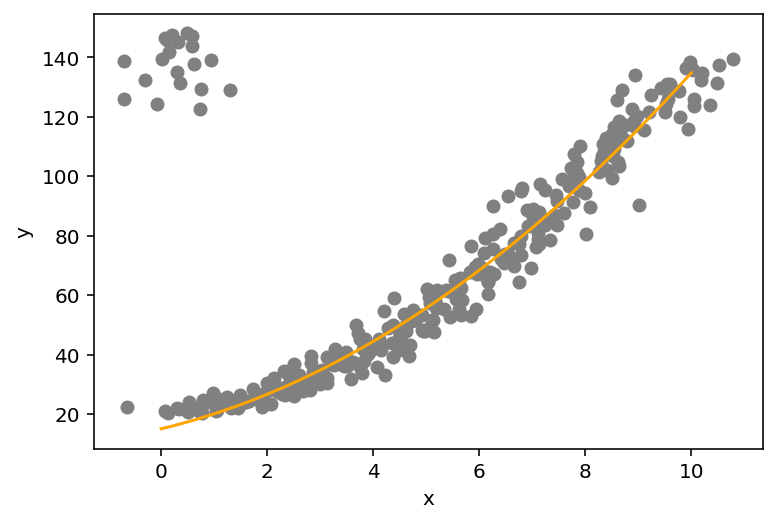

In [120]:
# Estimating W, which defines the hyperplane using gradient descent (you need to add code to this cell as indicated below).
# y = w0 + w1*x + w2*x^2

# Some settings.
Y = Y.reshape(-1, 1)
iterations    = 300000
learning_rate = 0.000001

# Gradient descent algorithm.
# Step 1. Initialize the parameters W.
W = np.matrix(np.zeros((3,1)))

for i in range(iterations):
    # Step 2. Calculate the gradient of L(W) w.r.t. W. 
    grad = grad_L_W(X, Y, W)
    
    # Step 3. Update parameters W.
    W = W - learning_rate * grad####### Write your code here #######  Hint: Use grad, W, learning_rate to implement Step 3 above.

# Print the parameters of the parabola.
w0, w1, w2 = np.array(W).reshape(-1)
print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))

# Visualization.
vis(w0, w1, w2)

### Parabola Estimation with Squared $L_2$ Norm and $L_1$ Norm

In this problem, we would like to use the gradient descent to calculate the parameters $W$ for the parabola.
The loss function $\mathcal{L}(W)$ now contains two parts: A squared $L_2$ norm and a $L_1$ norm.
A coefficient $\alpha$ is used to control the ratio of these two norms:

$$
\begin{align}
\mathcal{L}(W) 
& = \sum_{i=1}^{n} 
\Big(\alpha\big(\mathbf{x}_i^T W - y_i\big)^2 + (1-\alpha)|\mathbf{x}_i^T W - y_i| \Big) \\
& = \alpha\left\lVert X W - Y \right\rVert_2^2 + (1-\alpha)\left\lVert X W - Y \right\rVert_1 \\
\nonumber
\end{align}
$$

**Note:** It may take 2~3 mins to run the algorithm.

In [121]:
# Gradient of L(W) with respect to W (you need to add code to this cell as indicated below).

def grad_L_W(X, Y, W, alpha):
    
    return  (alpha * (2*(np.dot(np.dot(X.T, X), W)) - 2*(np.dot(X.T, Y)))) + ((1-alpha) * ((np.dot((np.sign((np.dot(X, W)) - Y)).T, X)).T))
    

In [122]:
# Function to use gradient descent to estimate parabola given a list of alphas
# (you need to add code to this cell as indicated below).
# Hint: For each alpha, you need to use gradient descent, hence, you need to write a loop inside the loop.

def parabola(alpha_list):
    # Some settings.
    global Y
    plt.scatter(old_X, Y, color='gray')
    Y = Y.reshape(-1, 1)
    iterations    = 300000
    learning_rate = 0.000001
    
    # Loop over alpha(s).
    for alpha in alpha_list:
        
        # Gradient descent algorithm.
        # Step 1. Initialize the parameters W.
        
        W = np.matrix(np.ones((3,1)))
        
        for i in range(iterations):
        
            # Step 2. Calculate the gradient of L(W) w.r.t. W. 
            
            grad = grad_L_W(X, Y, W, alpha)    
            
            # Step 3. Update parameters W.
            
            W = W - learning_rate * grad
            
        # Print the parameters of the parabola.
        w0, w1, w2 = np.array(W).reshape(-1)
        print('When alpha = {},'.format(alpha))
        print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))

        # Visualization.
        X_line = np.linspace(0,10,300)
        Y_line = w0 + w1 * X_line + w2 * (X_line**2)
        plt.plot(X_line, Y_line, label='alpha={}'.format(alpha))
        
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

When alpha = 0,
y = 15.54 + 4.09*x + 0.78*x^2
When alpha = 0.03,
y = 35.15 + -3.10*x + 1.35*x^2
When alpha = 0.05,
y = 45.82 + -6.83*x + 1.64*x^2
When alpha = 0.1,
y = 60.59 + -12.12*x + 2.05*x^2
When alpha = 1,
y = 71.07 + -16.06*x + 2.36*x^2


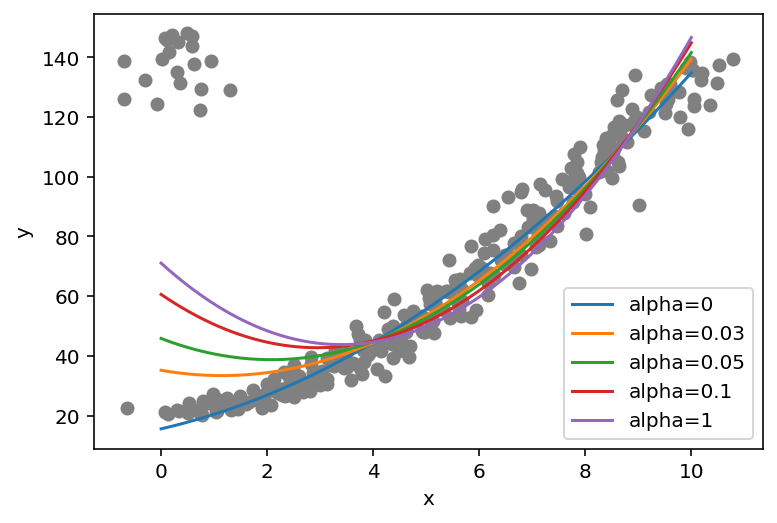

In [123]:
# Estimate the parabolas given the list of alpha(s).
parabola(alpha_list=[0,0.03,0.05,0.1,1])